# Worksheet 23

Name:  Haokun Wu
UID: U18377013

### Topics

- Neural Networks

## Neural Networks

Nothing to do in this worksheet except follow along in lecture / use this code to better understand Neural Networks.

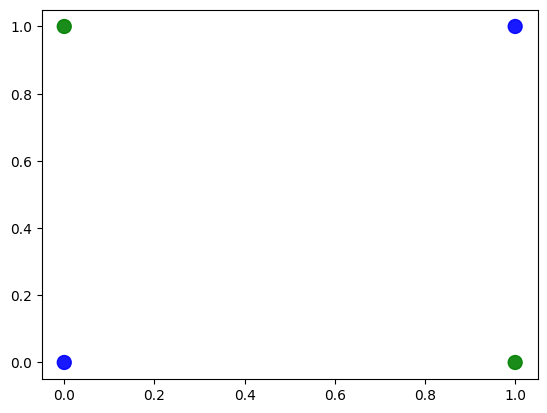

Epoch 1/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.7313
Epoch 2/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.7309
Epoch 3/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7303
Epoch 4/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7300
Epoch 5/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.7300
Epoch 6/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7291
Epoch 7/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7289
Epoch 8/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7286
Epoch 9/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7284
Epoch 10/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7283
Epoch 11/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7276
Epoch 12/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7277
Epoch 13/1000
4/4 [==============================

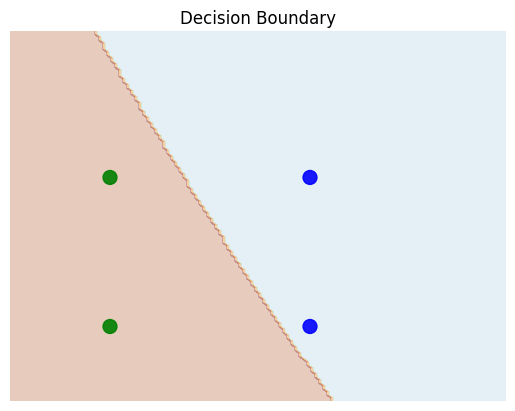

In [4]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from tensorflow import keras, random
from tensorflow.keras import layers

# Set random seed for reproducibility
np.random.seed(1)
random.set_seed(1)

# Data generation - don't modify
centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=200, centers=centers, cluster_std=1, random_state=1)

# Function definitions for generating data (circle, line, curve, xor)...

# XOR data generation
def generate_xor_data():
    X = np.array([
        [0,0],
        [0,1],
        [1,0],
        [1,1]])
    Y = np.array([x[0]^x[1] for x in X])
    return X, Y

# The model - modify this
model = keras.models.Sequential()
model.add(layers.Dense(2, input_dim=2, activation="sigmoid"))
model.add(layers.Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer='adam')

# Generate XOR data
X, Y = generate_xor_data()

# Colors for plotting
colors = np.array([x for x in 'bgrcmyk'])
colors = np.hstack([colors] * 20)

# plot the data
plt.scatter(X[:,0],X[:,1],color=colors[Y].tolist(), s=100, alpha=.9)
plt.show()

# Train the model
history = model.fit(X, Y, batch_size=1, epochs=1000)

# Plot the decision boundary
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots()
Z = model.predict(meshData)
Z = np.array([0 if x < .5 else 1 for x in Z])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=.3, cmap=plt.cm.Paired)
ax.axis('off')

# Plot also the training points
T = model.predict(X)
T = np.array([0 if x < .5 else 1 for x in T])
T = T.reshape(X[:,0].shape)
ax.scatter(X[:, 0], X[:, 1], color=colors[T].tolist(), s=100, alpha=.9)
plt.title("Decision Boundary")
plt.show()
